# LGM-VIP Data Science

## Iris Flowers Classification ML Project 

### By - Sanskruti Narwade

# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\sameer narwade\Desktop\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(['Id'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
df.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [9]:
df.min()

SepalLengthCm            4.3
SepalWidthCm               2
PetalLengthCm              1
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# EDA

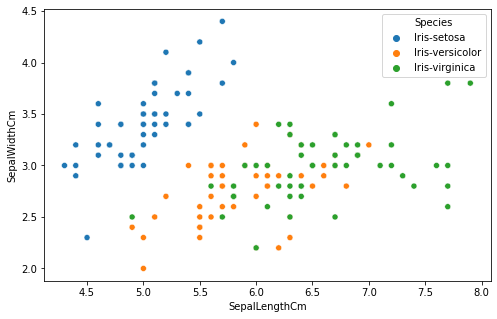

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",hue='Species',data=df)
plt.show()

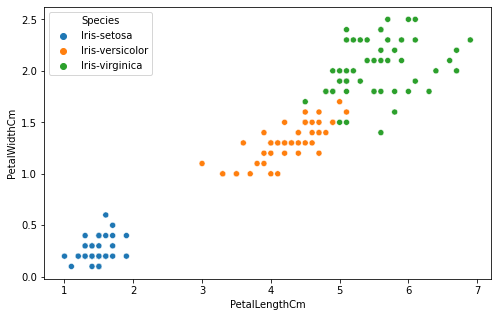

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",hue='Species',data=df)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='count'>

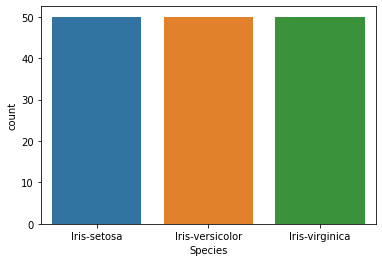

In [13]:
sns.countplot('Species',data=df)

In [14]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


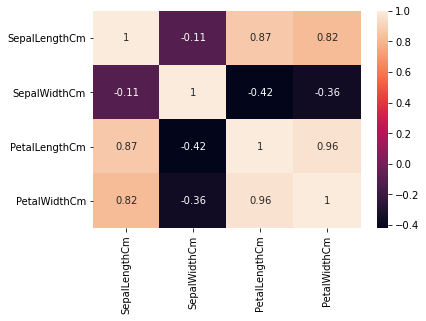

In [15]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
def distribution(col):
    sns.distplot(df[col])
    plt.show()

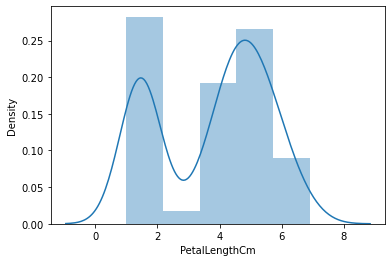

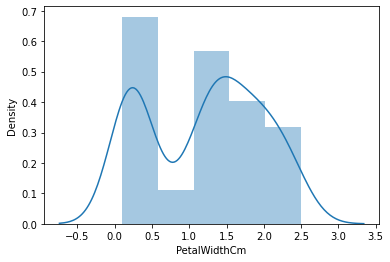

In [17]:
distribution('PetalLengthCm')
distribution('PetalWidthCm')

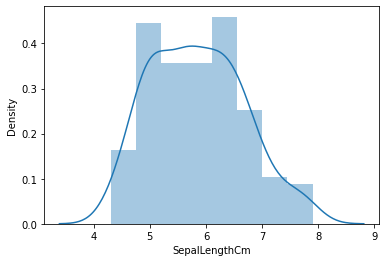

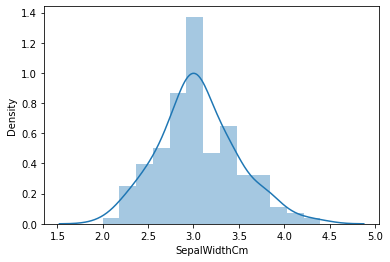

In [18]:
distribution('SepalLengthCm')
distribution('SepalWidthCm')

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le =LabelEncoder()

In [21]:
df['Species'] =le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
X = df.drop(['Species'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y = df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [27]:
def predict(algo):
    model = algo.fit(X_train,Y_train)
    prediction = model.predict(X_test)
    print('predictions are as :{}'.format(prediction))
    print('Training_score:{} %'.format((model.score(X_train,Y_train))*100))
    r2_score = metrics.r2_score(Y_test,prediction)*100
    print('accuracy_score is :{} %'.format(r2_score))
    print('confusion_matix :{}'.format(metrics.confusion_matrix(Y_test,prediction)))
    sns.distplot(Y_test-prediction)

# Testing Model

predictions are as :[1 0 1 2 0 2 0 2 0 2 2 1 2 0 1 1 0 2 2 0 1 0 1 0 1 2 2 0 0 1 2 1 1 0 2 1 2
 0]
Training_score:97.32142857142857 %
accuracy_score is :95.99578503688093 %
confusion_matix :[[13  0  0]
 [ 0 12  1]
 [ 0  0 12]]


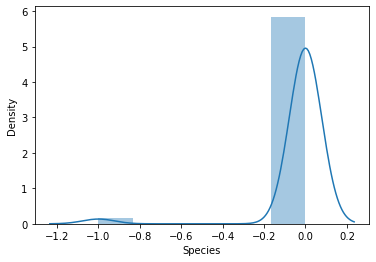

In [28]:
predict(LogisticRegression())